In [1]:
!pip install pandas gensim nltk scikit-learn matplotlib

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.4 MB 11.7 MB/s eta 0:00:02
   ------- -------------------------------- 4.5/24.4 MB 10.7 MB/s eta 0:00:02
   ----------- ---------------------------- 7.1/24.4 MB 11.5 MB/s eta 0:00:02
   --------------- ------------------------ 9.7/24.4 MB 11.4 MB/s eta 0:00:02
   -------------------- ------------------- 12.3/24.4 MB 11.5 MB/s eta 0:00:02
   ------------------------ --------------- 14.9/24.4 MB 11.6 MB/s eta 0:00:01
   ---------------------------- ----------- 17.6/24.4 MB 11.7 MB/s eta 0:00:01
   --------------------------------- ------ 20.2/24.4 MB 11.7 MB/s eta 0:00:01
   ------------------------------------- -- 22.8/24.4 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  23.9/24.4 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------  24.4/24.4 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------  24.4/24.4 MB 10.9 MB/


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

                                      subject  \
0                   hpl nom for may 25 , 2001   
1            re : nom / actual vols for 24 th   
2  enron actuals for march 30 - april 1 , 201   
3                   hpl nom for may 30 , 2001   
4                   hpl nom for june 1 , 2001   

                                                body  label sender receiver  \
0  ( see attached file : hplno 525 . xls )\r\n- h...      0    NaN      NaN   
1  - - - - - - - - - - - - - - - - - - - - - - fo...      0    NaN      NaN   
2  estimated actuals\r\nmarch 30 , 2001\r\nno flo...      0    NaN      NaN   
3  ( see attached file : hplno 530 . xls )\r\n- h...      0    NaN      NaN   
4  ( see attached file : hplno 601 . xls )\r\n- h...      0    NaN      NaN   

  date  urls  
0  NaN   NaN  
1  NaN   NaN  
2  NaN   NaN  
3  NaN   NaN  
4  NaN   NaN  
(82486, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 7 columns):
 #   Column    Non-Nu

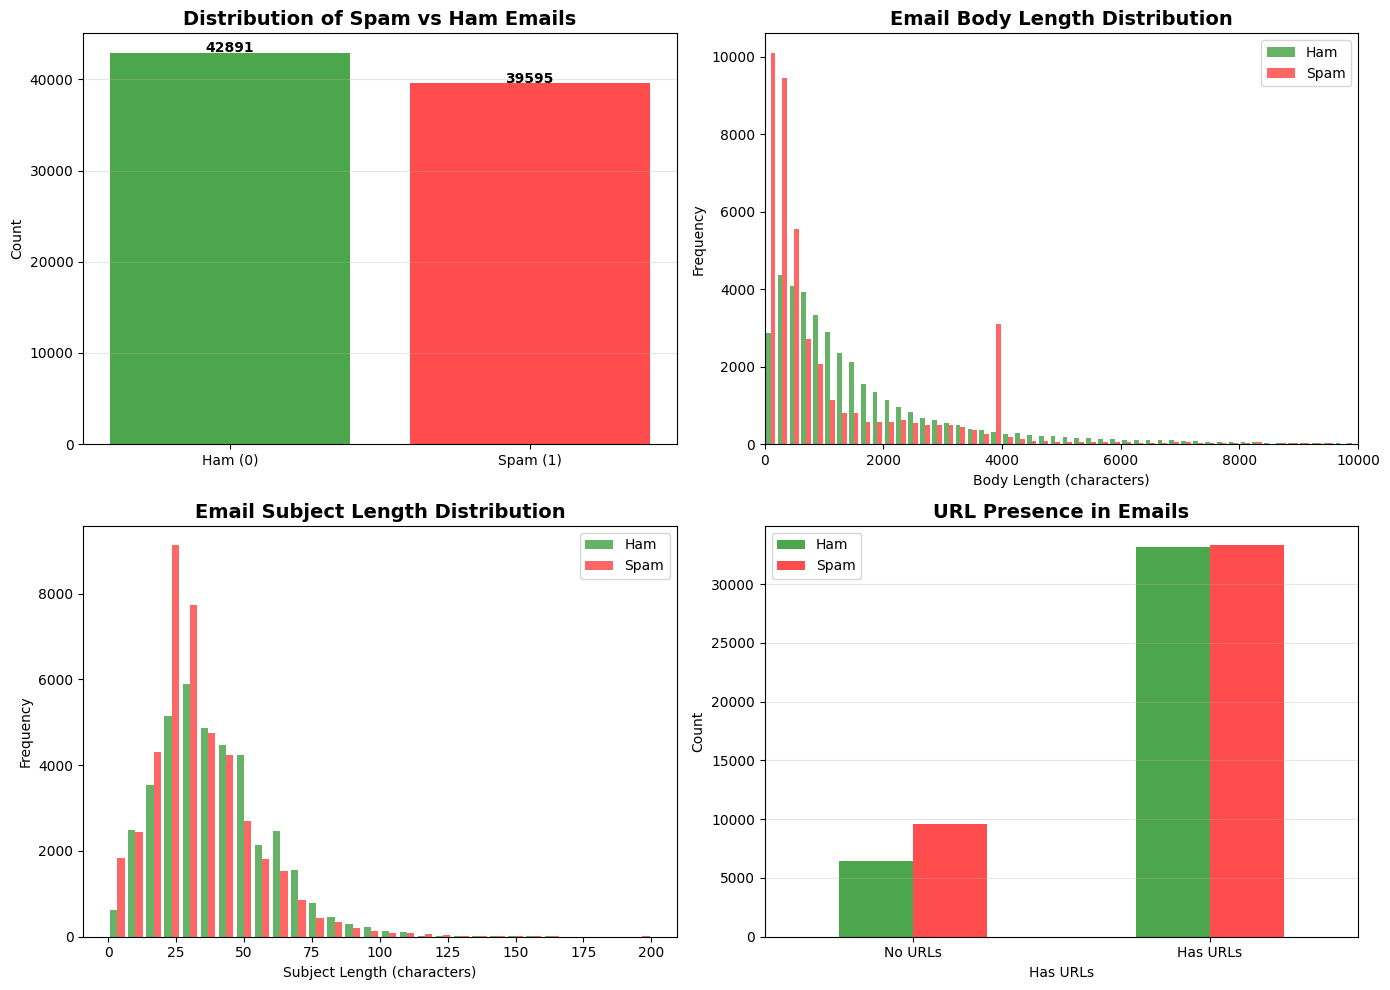

In [ ]:
# Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset in chunks to handle large files
df = pd.read_csv('dataset.csv', encoding='utf-8', chunksize=100000)
df = pd.concat(df, ignore_index=True)
print(df.head())

# Get basic info about the dataset
print(df.shape)
print(df.info())
print(df['label'].value_counts())

# Create visualizations for key insights
# 1. Distribution of spam vs ham emails
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Spam vs Ham distribution
label_counts = df['label'].value_counts()
axes[0, 0].bar(['Ham (0)', 'Spam (1)'], label_counts.values, color=['green', 'red'], alpha=0.7)
axes[0, 0].set_title('Distribution of Spam vs Ham Emails', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(label_counts.values):
    axes[0, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Email body length distribution
df['body_length'] = df['body'].astype(str).str.len()
axes[0, 1].hist([df[df['label']==0]['body_length'], df[df['label']==1]['body_length']],
                bins=50, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.6, range=(0, 10000))
axes[0, 1].set_title('Email Body Length Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Body Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim(0, 10000)

# Subject length distribution
df['subject_length'] = df['subject'].astype(str).str.len()
axes[1, 0].hist([df[df['label']==0]['subject_length'], df[df['label']==1]['subject_length']],
                bins=30, label=['Ham', 'Spam'], color=['green', 'red'], alpha=0.6, range=(0, 200))
axes[1, 0].set_title('Email Subject Length Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Subject Length (characters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# URL presence
df['has_urls'] = df['urls'].apply(lambda x: 0 if x == 0 else 1)
url_spam = df.groupby(['has_urls', 'label']).size().unstack(fill_value=0)
url_spam.plot(kind='bar', ax=axes[1, 1], color=['green', 'red'], alpha=0.7)
axes[1, 1].set_title('URL Presence in Emails', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Has URLs')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['No URLs', 'Has URLs'], rotation=0)
axes[1, 1].legend(['Ham', 'Spam'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [2]:
# Calculate some key statistics
print('Dataset Overview:')
print('Total emails: ' + str(len(df)))
print('Ham emails: ' + str(len(df[df['label']==0])) + ' (' + str(round(len(df[df['label']==0])/len(df)*100, 1)) + '%)')
print('Spam emails: ' + str(len(df[df['label']==1])) + ' (' + str(round(len(df[df['label']==1])/len(df)*100, 1)) + '%)')
print('')
print('Average body length - Ham: ' + str(round(df[df['label']==0]['body_length'].mean(), 1)) + ' characters')
print('Average body length - Spam: ' + str(round(df[df['label']==1]['body_length'].mean(), 1)) + ' characters')
print('')
print('Average subject length - Ham: ' + str(round(df[df['label']==0]['subject_length'].mean(), 1)) + ' characters')
print('Average subject length - Spam: ' + str(round(df[df['label']==1]['subject_length'].mean(), 1)) + ' characters')
print('')
print('Emails with URLs - Ham: ' + str(len(df[(df['label']==0) & (df['has_urls']==1)])) + ' (' + str(round(len(df[(df['label']==0) & (df['has_urls']==1)])/len(df[df['label']==0])*100, 1)) + '%)')
print('Emails with URLs - Spam: ' + str(len(df[(df['label']==1) & (df['has_urls']==1)])) + ' (' + str(round(len(df[(df['label']==1) & (df['has_urls']==1)])/len(df[df['label']==1])*100, 1)) + '%)')

Dataset Overview:
Total emails: 82486
Ham emails: 39595 (48.0%)
Spam emails: 42891 (52.0%)

Average body length - Ham: 2160.5 characters
Average body length - Spam: 1391.1 characters

Average subject length - Ham: 39.0 characters
Average subject length - Spam: 33.6 characters

Emails with URLs - Ham: 33141 (83.7%)
Emails with URLs - Spam: 33291 (77.6%)


In [10]:
# Download NLTK stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# 1. Load the Dataset
# Assuming your CSV has a column named 'text' or 'message' containing the emails
try:
    df = pd.read_csv('dataset.csv')
    # If the column name is different, change 'text' below to the correct name
    content_column = 'body'
except FileNotFoundError:
    print("Error: dataset.csv not found.")
    exit()

# 2. Preprocessing Function
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str): return []
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Tokenize
    words = text.split()
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    return words

print("Cleaning data...")
# Apply cleaning to create a list of lists (sentences)
corpus = [clean_text(doc) for doc in df[content_column]]

# 3. Train Word2Vec Model
print("Training Word2Vec model...")
# vector_size=100: Dimensionality of the feature vectors
# window=5: Maximum distance between the current and predicted word
# min_count=5: Ignores all words with total frequency lower than this
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4)

# 4. Linguistic Forensics / Analysis
print("\n--- Forensic Analysis ---")

# A. Semantic Similarity
# In a spam context, we want to see what words are used similarly to "money" or "urgent"
target_words = ['money', 'urgent', 'free', 'account', 'click']

for word in target_words:
    if word in model.wv:
        print(f"\nWords semantically similar to '{word}':")
        # specific to the context of YOUR dataset
        similar = model.wv.most_similar(word, topn=5)
        for sim_word, score in similar:
            print(f"  - {sim_word} (similarity: {score:.2f})")
    else:
        print(f"\n'{word}' not found in the dataset (frequency too low).")

# B. Odd-One-Out
# This detects words that don't fit the context of a list
try:
    odd_one = model.wv.doesnt_match(["scam", "phishing", "fraud", "hello"])
    print(f"\nOdd one out from [scam, phishing, fraud, hello]: {odd_one}")
except ValueError:
    pass

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khoid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khoid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaning data...
Training Word2Vec model...

--- Forensic Analysis ---

Words semantically similar to 'money':
  - fund (similarity: 0.71)
  - funds (similarity: 0.70)
  - monies (similarity: 0.61)
  - cash (similarity: 0.57)
  - sum (similarity: 0.56)

Words semantically similar to 'urgent':
  - await (similarity: 0.64)
  - cooperation (similarity: 0.60)
  - soonest (similarity: 0.59)
  - assistance (similarity: 0.59)
  - anticipation (similarity: 0.57)

Words semantically similar to 'free':
  - unlimited (similarity: 0.50)
  - complimentary (similarity: 0.49)
  - londoni (similarity: 0.47)
  - plus (similarity: 0.47)
  - click (similarity: 0.47)

Words semantically similar to 'account':
  - accounts (similarity: 0.71)
  - paypal (similarity: 0.58)
  - accountwe (similarity: 0.53)
  - login (similarity: 0.51)
  - temporarily (similarity: 0.48)

Words semantically similar to 'click':
  - clicking (similarity: 0.72)
  - enter (similarity: 0.61)
  - visit (similarity: 0.57)
  - addrconfn

c:\Users\khoid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\khoid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


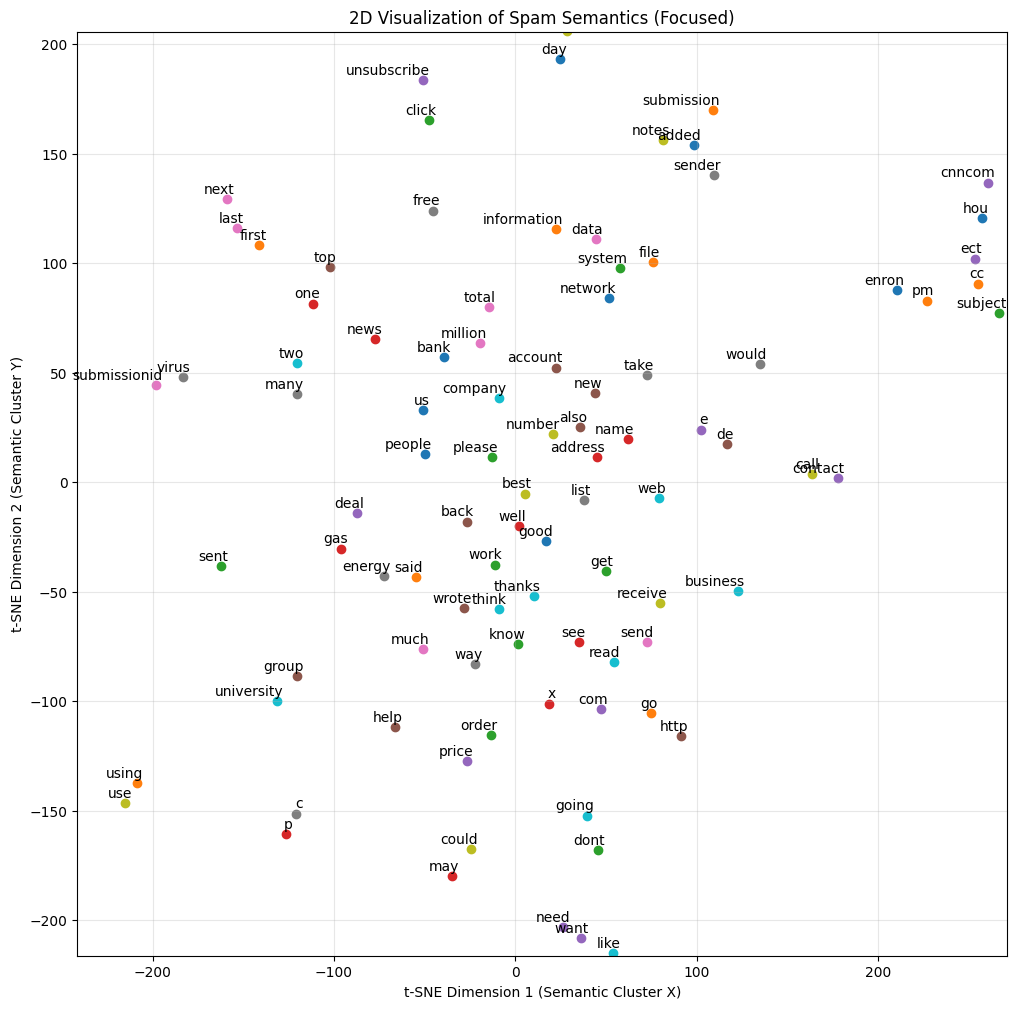

In [9]:
def plot_words(model, num_words=100):
    # 1. Get words and vectors
    words = list(model.wv.index_to_key)[:num_words]
    vectors_list = [model.wv[word] for word in words]

    # 2. Convert to Numpy Array (Fixes previous error)
    vectors_np = np.array(vectors_list)

    # 3. Run t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=3)
    vectors_2d = tsne.fit_transform(vectors_np)

    plt.figure(figsize=(12, 12))

    # 4. Plot points and annotations
    x_coords = vectors_2d[:, 0]
    y_coords = vectors_2d[:, 1]

    for i, word in enumerate(words):
        plt.scatter(x_coords[i], y_coords[i])
        plt.annotate(word, xy=(x_coords[i], y_coords[i]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')

    # 5. Add Axis Labels (Requested)
    plt.xlabel("t-SNE Dimension 1 (Semantic Cluster X)")
    plt.ylabel("t-SNE Dimension 2 (Semantic Cluster Y)")
    plt.title('2D Visualization of Spam Semantics (Focused)')

    # 6. FOCUS LOGIC: Automatic Outlier Removal
    # We calculate the 5th and 95th percentiles.
    # This keeps the middle 90% of points and ignores the top/bottom 5% (like "mail")
    x_min, x_max = np.percentile(x_coords, [5, 95])
    y_min, y_max = np.percentile(y_coords, [5, 95])

    # Add a small buffer (margin) so points aren't cut off at the exact edge
    x_buffer = (x_max - x_min) * 0.1
    y_buffer = (y_max - y_min) * 0.1

    plt.xlim(x_min - x_buffer, x_max + x_buffer)
    plt.ylim(y_min - y_buffer, y_max + y_buffer)

    plt.grid(True, alpha=0.3)
    plt.show()

# Run the updated function
plot_words(model)

In [11]:
!pip install textblob beautifulsoup4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Analyzing forensic features...

--- URL Suspicion Summary ---
Emails with IP-based URLs: 163.0
Emails with Anchor Mismatches: 0.0
Max Subdomains found in a single email: 10.0
Generating visualization...


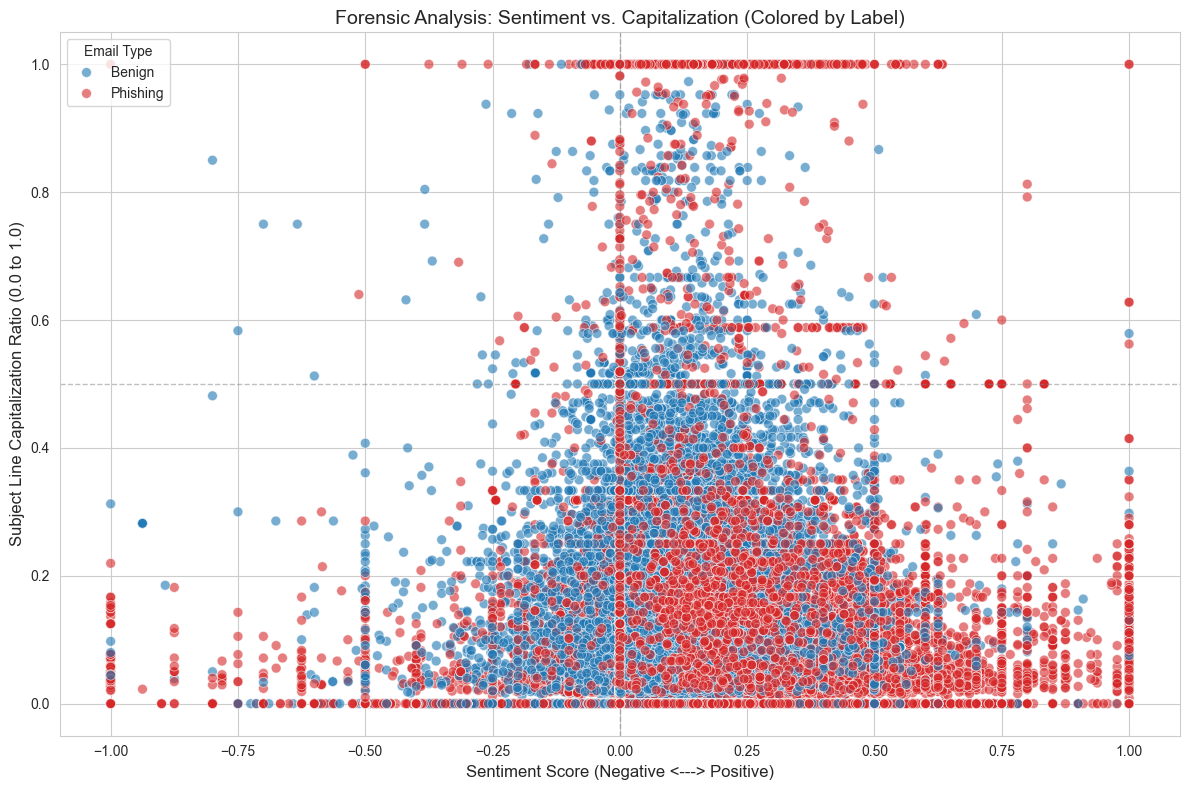

In [6]:
import pandas as pd
import re
import warnings
import seaborn as sns
from textblob import TextBlob
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
from urllib.parse import urlparse

# Define label column and values
label_column_name = 'label'
spam_value = 'Phishing'
ham_value = 'Benign'

# 1. Suppress the BeautifulSoup Warning
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

# 2. Load Data
try:
    df = pd.read_csv('dataset.csv')
    df['subject'] = df['subject'].fillna('')
    df['body'] = df['body'].fillna('')
except FileNotFoundError:
    print("Error: SpamAssasin.csv not found.")
    exit()

# Assuming 1 = Spam/Phishing and 0 = Ham/Benign
if df[label_column_name].dtype != object:
    df[label_column_name] = df[label_column_name].map({0: ham_value, 1: spam_value})
    # If the map failed (e.g. values were not 0/1), fill with original
    df[label_column_name] = df[label_column_name].fillna('Unknown')

def analyze_phishing_features(row):
    subject = str(row['subject'])
    body = str(row['body'])

    # --- Feature 1: Subject Line Capitalization Ratio ---
    clean_subject = re.sub(r'[^a-zA-Z]', '', subject)
    if len(clean_subject) > 0:
        uppercase_count = sum(1 for c in clean_subject if c.isupper())
        cap_ratio = uppercase_count / len(clean_subject)
    else:
        cap_ratio = 0.0

    # --- Feature 2: URL Lexical Analysis (Enhanced) ---
    url_suspicion_score = 0
    has_ip_url = 0
    anchor_mismatch = 0
    max_subdomains = 0

    # List to store found URLs to analyze: tuples of (url, anchor_text)
    found_links = []

    # A. Try HTML extraction first (for standard HTML emails)
    # We catch errors here just in case the HTML is extremely malformed
    try:
        soup = BeautifulSoup(body, 'html.parser')
        html_links = soup.find_all('a', href=True)
        for link in html_links:
            found_links.append((link['href'], link.get_text().strip()))
    except Exception:
        pass

    # B. Try Plain Text Regex extraction (The Fix for "0" results)
    # If it's a plain text email, HTML extraction missed the links.
    # This regex finds http/https links in raw text.
    text_links = re.findall(r'(https?://[^\s]+)', body)
    for link in text_links:
        # For plain text, the "anchor" is just the link itself
        found_links.append((link, link))

    # C. Analyze all found links
    for href, anchor in found_links:
        # Check 1: IP Address usage (e.g., http://192.168.1.1)
        if re.search(r'https?://\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', href):
            has_ip_url = 1
            url_suspicion_score += 1

        # Check 2: Subdomain Count
        try:
            domain = urlparse(href).netloc
            if domain:
                parts = domain.split('.')
                # Removing 'www' to avoid false positives
                if parts[0] == 'www': parts.pop(0)
                num_parts = len(parts)
                if num_parts > max_subdomains:
                    max_subdomains = num_parts
        except:
            pass

        # Check 3: Anchor Mismatch (Only applies if anchor is different from href)
        # We check if the anchor *looks* like a URL but points somewhere else
        # e.g. Anchor: "www.paypal.com", Href: "www.hackers.com"
        if anchor != href:
            if re.search(r'www\.|http', anchor):
                 # Simple check: is the anchor domain inside the href?
                 # If not, it's a mismatch.
                 if anchor not in href and href not in anchor:
                    anchor_mismatch = 1
                    url_suspicion_score += 2

    # --- Feature 3: Sentiment Analysis ---
    blob = TextBlob(body)
    sentiment = blob.sentiment.polarity

    return pd.Series({
        'Cap_Ratio': cap_ratio,
        'Has_IP_URL': has_ip_url,
        'Max_Subdomains': max_subdomains,
        'Anchor_Mismatch': anchor_mismatch,
        'Sentiment_Score': sentiment
    })

print("Analyzing forensic features...")
features_df = df.apply(analyze_phishing_features, axis=1)
result_df = pd.concat([df[['subject']], features_df], axis=1)
draw_df = pd.concat([df[[label_column_name]], features_df], axis=1)

print("\n--- URL Suspicion Summary ---")
print(f"Emails with IP-based URLs: {result_df['Has_IP_URL'].sum()}")
print(f"Emails with Anchor Mismatches: {result_df['Anchor_Mismatch'].sum()}")
print(f"Max Subdomains found in a single email: {result_df['Max_Subdomains'].max()}")

# --- Visualization with Color Coding ---
print("Generating visualization...")
# Use seaborn style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))

# Set up color palette: map your actual data values to red/blue
# Adjust 'spam_value' and 'ham_value' at top of script if yours are different (e.g., '1' and '0')
palette = {spam_value: 'tab:red', ham_value: 'tab:blue', 'Unknown': 'tab:gray'}

# Create scatter plot with Hue based on labels
sns.scatterplot(
    data=draw_df,
    x="Sentiment_Score",
    y="Cap_Ratio",
    hue=label_column_name, # This tells seaborn to color based on this column
    palette=palette,
    alpha=0.6, # Transparency helps see overlapping points
    s=50 # Dot size
)

# Add titles and labels
plt.title("Forensic Analysis: Sentiment vs. Capitalization (Colored by Label)", fontsize=14)
plt.xlabel("Sentiment Score (Negative <---> Positive)", fontsize=12)
plt.ylabel("Subject Line Capitalization Ratio (0.0 to 1.0)", fontsize=12)

# Add lines indicating neutral zones
plt.axvline(0, color='grey', linestyle='--', linewidth=1, alpha=0.5)
plt.axhline(0.5, color='grey', linestyle='--', linewidth=1, alpha=0.5)

# Improve legend
plt.legend(title='Email Type', loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

✅ Dataset loaded: 82486 rows.
Parsing dates...
✅ Successfully parsed 47525 rows (removed 34961 bad dates).


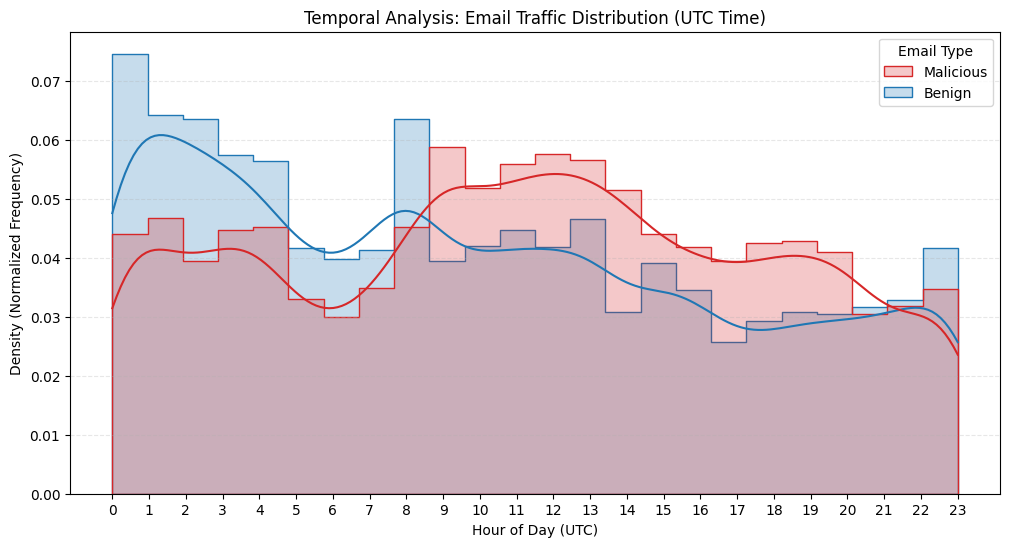


--- Summary Statistics (Hour sent - UTC) ---
              count       mean       std  min  25%   50%   75%   max
Email Type                                                          
Benign      20519.0   9.848677  7.023873  0.0  4.0   9.0  15.0  23.0
Malicious   27006.0  11.240761  6.591221  0.0  6.0  11.0  17.0  23.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import numpy as np

# 1. Load Data
try:
    df = pd.read_csv('dataset.csv')
    print(f"✅ Dataset loaded: {len(df)} rows.")
except FileNotFoundError:
    print("⚠️ Dataset not found.")
    exit()

if 'date' in df.columns and 'label' in df.columns:
    print("Parsing dates...")
    df['parsed_date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

    # Remove rows where date parsing failed
    df_clean = df.dropna(subset=['parsed_date']).copy()
    print(f"✅ Successfully parsed {len(df_clean)} rows (removed {len(df) - len(df_clean)} bad dates).")

    # 3. Extract the Hour (UTC)
    df_clean['hour'] = df_clean['parsed_date'].dt.hour

    # Don't overwrite df_clean! Create a NEW column 'Email Type'
    df_clean['Email Type'] = df_clean['label'].map({0: 'Benign', 1: 'Malicious'})

    # Fill NaN if mapping missed anything (just in case)
    df_clean['Email Type'] = df_clean['Email Type'].fillna('Unknown')

    # 4. Visualization
    plt.figure(figsize=(12, 6))

    sns.histplot(
        data=df_clean,
        x='hour',
        hue='Email Type',
        multiple="layer",
        element="step",
        stat="density",
        common_norm=False,
        bins=24,
        palette={'Benign': 'tab:blue', 'Malicious': 'tab:red', 'Unknown': 'gray'},
        kde=True
    )

    plt.title('Temporal Analysis: Email Traffic Distribution (UTC Time)')
    plt.xlabel('Hour of Day (UTC)')
    plt.ylabel('Density (Normalized Frequency)')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

    # 5. Statistical Summary
    print("\n--- Summary Statistics (Hour sent - UTC) ---")
    print(df_clean.groupby('Email Type')['hour'].describe())

else:
    print("Error: The dataset must contain 'date' and 'label' columns.")

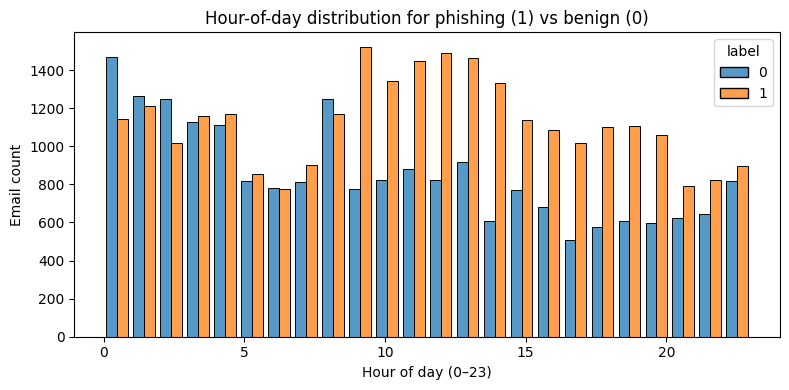

label  label  hour
0      0      0       0.071446
              1       0.061504
              2       0.060870
              3       0.054973
              4       0.054096
              5       0.039963
              6       0.038160
              7       0.039524
              8       0.060870
              9       0.037819
              10      0.040158
              11      0.042887
              12      0.040109
              13      0.044642
              14      0.029485
              15      0.037429
              16      0.033140
              17      0.024660
              18      0.028023
              19      0.029485
              20      0.029144
              21      0.030265
              22      0.031386
              23      0.039963
1      1      0       0.042250
              1       0.044805
              2       0.037732
              3       0.042842
              4       0.043250
              5       0.031623
dtype: float64


In [16]:
# Assuming df already exists and has a 'date' column and a 'label' column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Parse the date column robustly
df['date_parsed'] = pd.to_datetime(
    df['date'],
    errors='coerce',          # invalid dates become NaT
    utc=True
)

# 2. Keep only rows with valid timestamps
df_time = df.dropna(subset=['date_parsed']).copy()

# 3. Extract hour-of-day feature
df_time['hour'] = df_time['date_parsed'].dt.hour

# 4. Plot hour-of-day distribution by label (counts per hour)
plt.figure(figsize=(8, 4))
sns.histplot(
    data=df_time,
    x='hour',
    hue='label',
    multiple='dodge',   # side‑by‑side bars
    bins=24,
    shrink=0.8
)
plt.title('Hour-of-day distribution for phishing (1) vs benign (0)')
plt.xlabel('Hour of day (0–23)')
plt.ylabel('Email count')
plt.tight_layout()
plt.show()

# 5. (Optional) Get normalized distributions per label
hour_label_counts = df_time.groupby(['label', 'hour']).size()
hour_label_dist = hour_label_counts.groupby(level=0).apply(
    lambda x: x / x.sum()
)

print(hour_label_dist.head(30))

In [7]:
!pip install neo4j pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

# --- Configuration ---
URI = "neo4j+s://YOUR_ID.databases.neo4j.io" # Found in Aura Console
AUTH = ("neo4j", "YOUR_PASSWORD")
CSV_PATH = "dataset.csv"
SAMPLE_SIZE = 50000

# 1. Load and Preprocess Data
print("Loading CSV...")
df = pd.read_csv(CSV_PATH)

# Check if we need to downsample
if len(df) > SAMPLE_SIZE:
    print(f"Dataset has {len(df)} rows. Downsampling to {SAMPLE_SIZE}...")
    # random_state=42 ensures you get the same 'random' rows if you run it twice
    df = df.sample(n=SAMPLE_SIZE, random_state=42)
else:
    print(f"Dataset is small ({len(df)} rows). using all data.")

# 2. Preprocessing
print("Cleaning data...")
# Clean Data types (Previous fixes)
df['urls'] = df['urls'].fillna('').astype(str)
df['subject'] = df['subject'].fillna('').astype(str)
df['body'] = df['body'].fillna('').astype(str)

# --- THE FIX FOR "PROPERTY VALUE TOO LARGE" ---
# 1. Fill NaNs first
df['sender'] = df['sender'].fillna('unknown_sender').astype(str)
df['receiver'] = df['receiver'].fillna('unknown_receiver').astype(str)

# 2. Define a safe limit (e.g., 1024 chars).
# Real emails are rarely longer than 254 chars (RFC 5321).
MAX_EMAIL_LEN = 1024

# 3. Truncate any sender/receiver longer than the limit
# We allow the string to be cut off because a 17k char email is garbage anyway.
df['sender'] = df['sender'].apply(lambda x: x[:MAX_EMAIL_LEN])
df['receiver'] = df['receiver'].apply(lambda x: x[:MAX_EMAIL_LEN])

# 2. Define the Cypher Import Query
# We use MERGE for Users/Urls to avoid duplicates (idempotency)
# We use CREATE for Emails because every email is unique (even if same subject)
import_query = """
UNWIND $batch AS row
MERGE (sender:User {email: row.sender})
MERGE (receiver:User {email: row.receiver})

CREATE (e:Email {
    subject: row.subject,
    date: row.date,
    label: row.label,
    body_length: size(row.body)
})

MERGE (sender)-[:SENT]->(e)
MERGE (e)-[:RECEIVED_BY]->(receiver)

// Handle URLs if they exist
WITH e, row
UNWIND split(row.urls, ';') AS url_string
WITH e, trim(url_string) AS clean_url
WHERE clean_url <> ""
MERGE (u:Url {link: clean_url})
MERGE (e)-[:LINKS_TO]->(u)
"""

# 3. Execution Function
def upload_data(tx, batch_data):
    tx.run(import_query, batch=batch_data)

# 4. Connect and Run
driver = GraphDatabase.driver(URI, auth=AUTH)

# Batch processing (Graph DBs handle chunks better than 1-by-1)
BATCH_SIZE = 1000
print("Starting Import...")

try:
    with driver.session() as session:
        # --- NEW STEP 1: CLEAR DATABASE AUTOMATICALLY ---
        print("⚠️  Clearing previous database data...")
        session.run("MATCH (n) CALL { WITH n DETACH DELETE n } IN TRANSACTIONS OF 10000 ROWS")
        print("Database cleared.")
        # ------------------------------------------------

        # Step 2: Create Constraints (indexes)
        print("Creating constraints...")
        session.run("CREATE CONSTRAINT IF NOT EXISTS FOR (u:User) REQUIRE u.email IS UNIQUE")
        session.run("CREATE CONSTRAINT IF NOT EXISTS FOR (url:Url) REQUIRE url.link IS UNIQUE")

        # Step 3: Loop and Upload
        print(f"Starting import of {len(df)} rows...")
        batch = []
        for index, row in df.iterrows():
            batch.append(row.to_dict())

            if len(batch) >= BATCH_SIZE:
                session.execute_write(upload_data, batch)
                # print(f"Processed {index+1} rows...")
                batch = []

        # Upload remaining
        if batch:
            session.execute_write(upload_data, batch)

    print("Import Complete!")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    driver.close()

Loading CSV...
Dataset has 82486 rows. Downsampling to 50000...
Cleaning data...
Starting Import...
⚠️  Clearing previous database data...


Received notification from DBMS server: <GqlStatusObject gql_status='01N00', status_description='warn: feature deprecated. CALL subquery without a variable scope clause is deprecated. Use CALL (n) { ... }', position=<SummaryInputPosition line=1, column=11, offset=10>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 10, 'line': 1, 'column': 11}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: 'MATCH (n) CALL { WITH n DETACH DELETE n } IN TRANSACTIONS OF 10000 ROWS'


Database cleared.
Creating constraints...
Starting import of 50000 rows...
Import Complete!
